In [ ]:
#vaxesbytype = vaxes[['VAX_TYPE', 'VAX_NAME']].groupby('VAX_TYPE').agg(['VAX_NAME', ', '.join])
#vaxesbytype = vaxes[['VAX_TYPE', 'VAX_NAME']].groupby('VAX_TYPE')['VAX_NAME'].transform(lambda x : '|'.join(x)).reset_index()
#vaxesbytype.drop_duplicates(inplace=True)
#vaxesbytype
#vaxesbytype = vaxes[['VAX_TYPE', 'VAX_NAME', 'VAX_MANU']].sort_values(['VAX_TYPE', 'VAX_NAME', 'VAX_MANU']).drop_duplicates()
#vaxesbytype.to_excel('vaxesbytype.xlsx', index=False)


In [ ]:
#tady to pocitam z VAX dat, ale to podle myho pocita blbe, budou tam duplicity
disease_count = vaxes[['VAX_TYPE', 'VAERS_ID']].merge(disease_by_vax,
                                                        left_on='VAX_TYPE',
                                                        right_on='VAX_TYPE').groupby('DISEASE').agg('count').reset_index().sort_values('DISEASE')
disease_count_noc19 = disease_count[disease_count['DISEASE'] != 'Covid 19']

In [ ]:
# vezmu informace z bigdat.
# hm, mozna bych to mohl vzit i z VAX dat a vysledek by byl stejnej, jde o tu deduplikaci,
# protoze potrebuju jen ciste pocty IDcek v jednotlivych nemocech
disease_data = pd.merge( left=bigdata,
                    right=disease_by_vax,
                    left_on='VAX_TYPE',
                    right_on='VAX_TYPE')[['DISEASE', 'VAERS_ID']].drop_duplicates(keep='first')

In [ ]:
disease_count = disease_data.groupby('DISEASE').agg('count').reset_index()
disease_count_noc19 = disease_count[disease_count['DISEASE'] != 'Covid 19']

In [ ]:
# data pro graf
filtr = disease_count

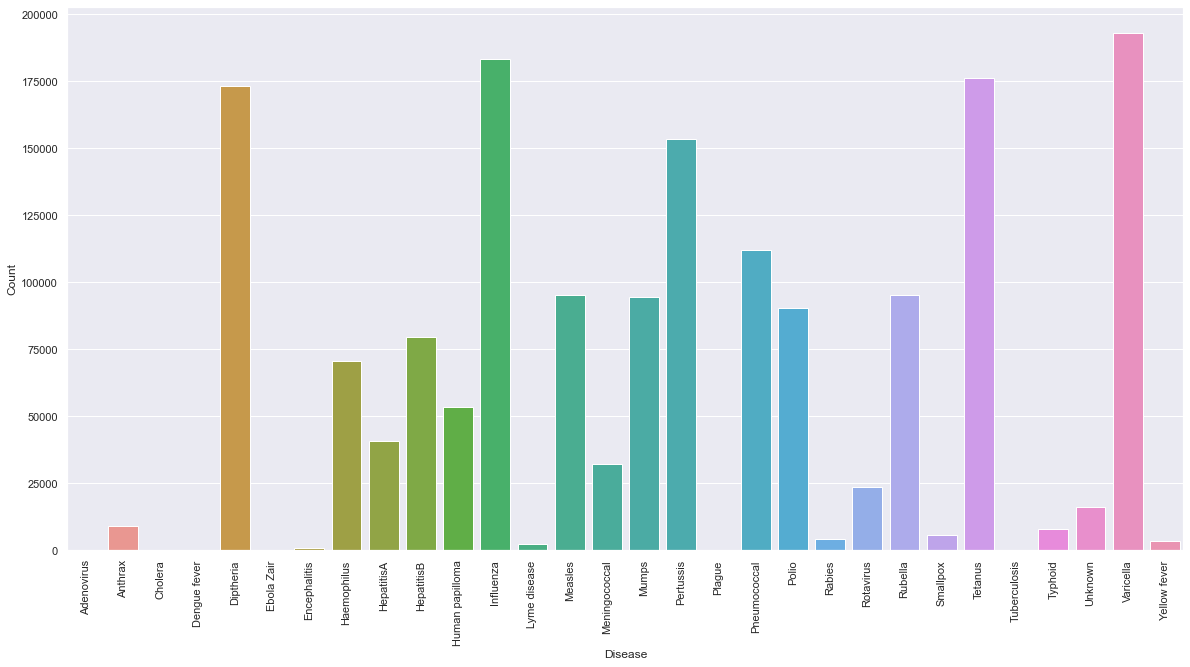

In [ ]:
sns.set(palette = 'Blues_d')
plt.figure(figsize=(20, 10))
ax = sns.barplot(x = 'DISEASE', y = 'VAERS_ID', data = disease_count_noc19)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.ylabel('Count')
plt.xlabel('Disease')
plt.show()

In [ ]:
disease_count_noc19[['DISEASE', 'VAERS_ID']].rename(columns={'VAERS_ID': 'Count'})

,DISEASE,Count
0,Adenovirus,190
1,Anthrax,9218
2,Cholera,201
4,Dengue fever,34
5,Diptheria,173432
6,Ebola Zair,43
7,Encephalitis,912
8,Haemophilus,70582
9,HepatitisA,40871
10,HepatitisB,79513
